In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import lifetimes
import datetime
from lifetimes.utils import summary_data_from_transaction_data
import math

%matplotlib inline

In [2]:
os.chdir("D:\\Klaviyo_problem")
data_name = "Klaviyo_DS_Exercise_Sample_Data.csv"
data = pd.read_csv(data_name)

In [3]:
data

,Id,Timestamp,PurchaseValue
0,4ec6fab0e2fca65b2950fbc9fffa45f8,2017-12-06T17:53:59Z,261.54
1,8170354d9b20f5edc7747886e7fbda90,2017-12-06T17:48:19Z,206.07
2,5780f7258e491e462611d65f1dbd1956,2017-12-06T17:46:49Z,78.84
3,e5966041d824f1bdc3ac190d49a8bbec,2017-12-06T17:46:41Z,50.42
4,52aa2478574fe7a4a78162074eb6c987,2017-12-06T17:34:56Z,274.62
5,484863f99af19175727737e4cf4641d4,2017-12-06T17:33:32Z,133.25
6,cdefb2a09bc1171ab27b70c723bc34af,2017-12-06T17:30:14Z,485.71
7,c920c7fcf20aaaf40d08b9ad61a81235,2017-12-06T17:30:12Z,131.76
8,c36698690b851c2f575b54a34dbc7a4c,2017-12-06T17:29:03Z,376.08
9,26a2236dc2d3ada658e710062bbe3355,2017-12-06T17:27:28Z,98.5


### Transform hash code to customer id

In [4]:
Id_list = list(set(data["Id"].tolist()))

Id_map = dict(zip(Id_list, range(len(Id_list))))

data["Id_map"] = data["Id"].map(Id_map)

data_1 = data.drop("Id", axis=1)

data_1

,Timestamp,PurchaseValue,Id_map
0,2017-12-06T17:53:59Z,261.54,19676
1,2017-12-06T17:48:19Z,206.07,17921
2,2017-12-06T17:46:49Z,78.84,4507
3,2017-12-06T17:46:41Z,50.42,19468
4,2017-12-06T17:34:56Z,274.62,18593
5,2017-12-06T17:33:32Z,133.25,19213
6,2017-12-06T17:30:14Z,485.71,9509
7,2017-12-06T17:30:12Z,131.76,22324
8,2017-12-06T17:29:03Z,376.08,16830
9,2017-12-06T17:27:28Z,98.5,12177


In [5]:
def to_datetime(str_ts):
    ymd = str_ts.split("T")[0]
    hms = str_ts.split("T")[1][:-1]
    [y, m1, d] = list(map(int, ymd.split("-")))
    [h, m2, s] = list(map(int, hms.split(":")))
    return datetime.datetime(year=y, month=m1, day=d, hour=h, minute=m2, second=s)

In [6]:
datetime_ts = list(map(to_datetime, data_1["Timestamp"].tolist()))
data_1["datetime_ts"] = datetime_ts

data_2 = data_1.drop("Timestamp", axis=1)

data_2

,PurchaseValue,Id_map,datetime_ts
0,261.54,19676,2017-12-06 17:53:59
1,206.07,17921,2017-12-06 17:48:19
2,78.84,4507,2017-12-06 17:46:49
3,50.42,19468,2017-12-06 17:46:41
4,274.62,18593,2017-12-06 17:34:56
5,133.25,19213,2017-12-06 17:33:32
6,485.71,9509,2017-12-06 17:30:14
7,131.76,22324,2017-12-06 17:30:12
8,376.08,16830,2017-12-06 17:29:03
9,98.5,12177,2017-12-06 17:27:28


In [8]:
grouped_by_id = data_2.groupby('Id_map')

day_diff_dict = {}
day_diff_2_dict = {}

for _id, group in grouped_by_id:
    ts_list = sorted(group['datetime_ts'].tolist())
    if len(ts_list) == 1:
        time_diff = 'NA'
    else:
        prev_ts = ts_list[:-1]
        late_ts = ts_list[1:]
        ts_diff_list = [(late_ts[i] - prev_ts[i]).days for i in range(len(prev_ts))]
        if len(ts_diff_list) == 1:
            time_diff_2 = 'NA'
        else:
            prev_ts_2 = ts_diff_list[:-1]
            late_ts_2 = ts_diff_list[1:]
            ts_diff_2_list = [abs(late_ts_2[i] - prev_ts_2[i]) for i in range(len(prev_ts_2))]
            time_diff_2 = float(sum(ts_diff_2_list)) / len(ts_diff_2_list)
        day_diff_dict[_id] = ts_diff_list
        day_diff_2_dict[_id] = time_diff_2

In [9]:
day_diff_2_dict

{4: 70.25,
 5: 14.0,
 8: 96.0,
 12: 'NA',
 15: 129.0,
 17: 'NA',
 19: 'NA',
 25: 11.0,
 27: 112.0,
 29: 13.0,
 30: 15.0,
 36: 66.75,
 37: 'NA',
 39: 'NA',
 41: 'NA',
 43: 'NA',
 47: 56.75,
 48: 213.0,
 49: 'NA',
 55: 'NA',
 58: 23.0,
 61: 40.0,
 63: 73.5,
 64: 28.0,
 65: 'NA',
 68: 'NA',
 72: 52.5,
 75: 65.0,
 79: 123.5,
 80: 62.0,
 82: 3.0,
 85: 92.5,
 86: 'NA',
 90: 'NA',
 93: 40.4,
 96: 283.0,
 100: 60.666666666666664,
 103: 'NA',
 107: 63.0,
 108: 'NA',
 111: 9.0,
 115: 11.193548387096774,
 116: 33.125,
 120: 'NA',
 127: 165.0,
 128: 36.5,
 129: 'NA',
 130: 'NA',
 131: 25.875,
 132: 'NA',
 134: 72.0,
 135: 101.5,
 136: 42.25,
 139: 'NA',
 142: 7.0,
 145: 64.0,
 146: 'NA',
 148: 94.0,
 149: 'NA',
 150: 58.666666666666664,
 154: 'NA',
 157: 49.6,
 158: 'NA',
 160: 53.0,
 163: 'NA',
 167: 27.142857142857142,
 168: 70.33333333333333,
 172: 28.0,
 176: 'NA',
 177: 31.0,
 178: 82.0,
 179: 48.0,
 181: 35.1,
 183: 169.5,
 184: 123.0,
 185: 'NA',
 186: 'NA',
 187: 131.5,
 191: 30.0,
 192: '

In [10]:
day_diff_dict

{4: [9, 46, 33, 137, 10],
 5: [0, 14],
 8: [102, 6],
 12: [56],
 15: [41, 170],
 17: [114],
 19: [11],
 25: [84, 95],
 27: [117, 5],
 29: [125, 138],
 30: [2, 7, 32],
 36: [20, 18, 3, 14, 253],
 37: [4],
 39: [56],
 41: [152],
 43: [86],
 47: [115, 143, 3, 27, 62],
 48: [250, 37],
 49: [126],
 55: [2],
 58: [0, 23],
 61: [2, 44, 2, 3, 0, 112],
 63: [163, 28, 16],
 64: [2, 73, 65, 22, 21, 4],
 65: [0],
 68: [80],
 72: [0, 0, 105],
 75: [57, 122],
 79: [20, 161, 55],
 80: [55, 117],
 82: [3, 0],
 85: [23, 104, 0],
 86: [67],
 90: [22],
 93: [0, 56, 37, 0, 37, 90],
 96: [3, 286],
 100: [177, 62, 11, 27],
 103: [32],
 107: [17, 4, 94, 180],
 108: [37],
 111: [4, 13],
 115: [7,
  10,
  20,
  0,
  4,
  14,
  47,
  13,
  5,
  4,
  3,
  7,
  6,
  14,
  12,
  20,
  7,
  2,
  16,
  0,
  4,
  7,
  9,
  17,
  0,
  14,
  4,
  29,
  3,
  23,
  10,
  0],
 116: [17, 31, 0, 4, 4, 1, 31, 111, 8],
 120: [175],
 127: [5, 170],
 128: [34, 78, 49],
 129: [265],
 130: [176],
 131: [95, 17, 6, 7, 1, 16, 0, 74

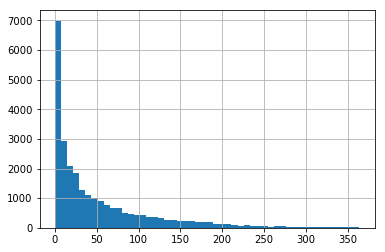

In [11]:
time_interval_list = []
i=0
for k in day_diff_dict:
    time_interval_list.extend(day_diff_dict[k])

time_interval_series = pd.Series(data=time_interval_list)

time_interval_series.hist(bins=50)

In [12]:
ts_2_diff_series = pd.Series(day_diff_2_dict)

ts_2_diff_series_noNA = ts_2_diff_series[ts_2_diff_series != 'NA']

ts_2_diff_series_noNA_gt1m = ts_2_diff_series_noNA[ts_2_diff_series_noNA > 30]

ts_2_diff_series_noNA_lt1m = ts_2_diff_series_noNA[ts_2_diff_series_noNA <= 30]

continuous_index = ts_2_diff_series_noNA_gt1m.size / ts_2_diff_series_noNA_lt1m.size

continuous_index

2.0639344262295083

In [13]:
summary_data = summary_data_from_transaction_data(data_2, 'Id_map', 'datetime_ts')
summary_data

,frequency,recency,T
Id_map,,,
0,0.0,0.0,360.0
1,0.0,0.0,273.0
2,0.0,0.0,314.0
3,0.0,0.0,165.0
4,5.0,238.0,350.0
5,1.0,15.0,23.0
6,0.0,0.0,151.0
7,0.0,0.0,359.0
8,2.0,108.0,174.0


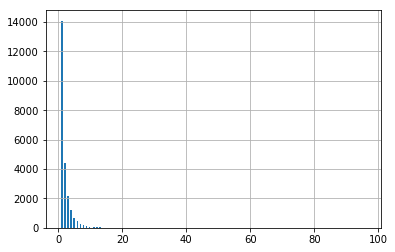

In [14]:
purchase_rate_series = summary_data['frequency'] + 1
purchase_rate_series.hist(bins=200)

In [15]:
training_period = 180

start_ts = data_2['datetime_ts'].min()
end_ts = data_2['datetime_ts'].max()

In [16]:
start_ts

Timestamp('2016-11-30 04:47:00')

In [17]:
end_ts

Timestamp('2017-12-06 17:53:59')

In [18]:
from datetime import timedelta

training_end = start_ts + timedelta(days=training_period)

In [21]:
data_2_training = data_2.loc[(data_2['datetime_ts'] >= start_ts) & (data_2['datetime_ts'] <= training_end)]

data_2_validation = data_2.loc[(data_2['datetime_ts'] >= training_end) & (data_2['datetime_ts'] <= end_ts)]

In [22]:
summary_data_training = summary_data_from_transaction_data(data_2_training, 'Id_map', 'datetime_ts')

summary_data_validation = summary_data_from_transaction_data(data_2_validation, 'Id_map', 'datetime_ts')

In [23]:
summary_data_training

,frequency,recency,T
Id_map,,,
0,0.0,0.0,169.0
1,0.0,0.0,82.0
2,0.0,0.0,123.0
4,3.0,89.0,159.0
7,0.0,0.0,168.0
9,0.0,0.0,35.0
12,0.0,0.0,36.0
15,1.0,41.0,87.0
17,0.0,0.0,23.0


In [24]:
summary_data_validation

,frequency,recency,T
Id_map,,,
3,0.0,0.0,165.0
4,1.0,11.0,123.0
5,1.0,15.0,23.0
6,0.0,0.0,151.0
8,2.0,108.0,174.0
10,0.0,0.0,146.0
11,0.0,0.0,181.0
12,0.0,0.0,170.0
13,0.0,0.0,11.0


## model fitting and validation

In [25]:
penalizer_coef_pnf = 0.1
penalizer_coef_bgf = 0.1

In [27]:
from lifetimes import ParetoNBDFitter
from lifetimes import BetaGeoFitter

pnf = ParetoNBDFitter(penalizer_coef=penalizer_coef_pnf)
bgf = BetaGeoFitter(penalizer_coef=penalizer_coef_bgf)

pnf.fit(summary_data_training["frequency"], summary_data_training["recency"], summary_data_training["T"])
bgf.fit(summary_data_training["frequency"], summary_data_training["recency"], summary_data_training["T"])

<lifetimes.BetaGeoFitter: fitted with 13166 subjects, a: 0.14, alpha: 8.25, b: 0.20, r: 0.15>

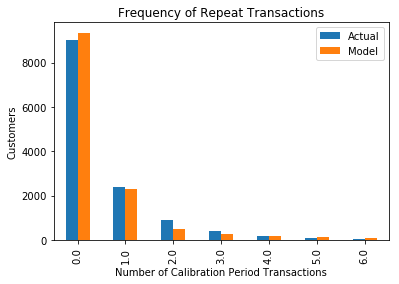

In [28]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

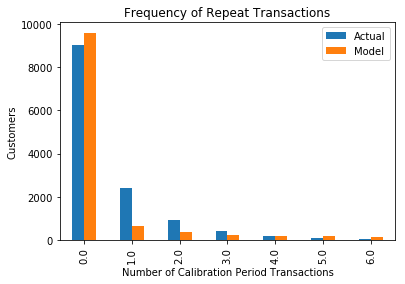

In [29]:
plot_period_transactions(pnf)

### metric to be used for model selection

In [31]:
freq_list_training = list(set(summary_data_training["frequency"].tolist()))

In [35]:
num_row, num_col = summary_data_training.shape

In [32]:
freq_list_training

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 33.0,
 17.0,
 18.0,
 20.0,
 21.0]

In [40]:
freq_id_map = {}

for freq in freq_list_training:
    cor_cust_id = summary_data_training.loc[summary_data_training["frequency"] == freq].index.values
    freq_id_map[freq] = cor_cust_id

In [43]:
freq_id_map[0.0]

array([    0,     1,     2, ..., 23735, 23738, 23739], dtype=int64)

In [ ]:
freq_avgfreq_map = {}

for freq, id_list in freq_id_map.items():
    for _id in id_list